In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import Image
import graphviz

In [2]:
# Load the dataset
df = pd.read_csv('Cars-RF.csv')

In [3]:
# Rename column names
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']

In [4]:
# View summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1727 non-null   object
 1   maint          1727 non-null   object
 2   doors          1727 non-null   object
 3   persons        1727 non-null   object
 4   lug_boot       1727 non-null   object
 5   safety         1727 non-null   object
 6   acceptability  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [5]:
# Frequency counts of all categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].value_counts()}")

buying: high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
maint: high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
doors: 3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
persons: 4       576
more    576
2       575
Name: persons, dtype: int64
lug_boot: med      576
big      576
small    575
Name: lug_boot, dtype: int64
safety: med     576
high    576
low     575
Name: safety, dtype: int64
acceptability: unacc    1209
acc       384
good       69
vgood      65
Name: acceptability, dtype: int64


In [6]:
# Check for any Null values
print(df.isnull().sum())

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(df.drop(['acceptability'], axis=1), df['acceptability'], test_size=0.4, random_state=0)

# Check the shape of X_train and X_test
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (1036, 6)
X_test (691, 6)


In [8]:
# Check the shape of X_train and X_test
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# Check data types of variables
print(X_train.dtypes)

X_train: (1036, 6) X_test: (691, 6)
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object


In [9]:
# Import libraries
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to all categorical variables
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier with default parameters
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Initialize Random Forest Classifier with n_estimators = 100
rf_100 = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Extract feature importance scores using a trained Random Forest Classifier model
importance_scores = rf_100.feature_importances_

# Create a dataframe to display feature importance scores in descending order
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display feature importance scores
print(feature_importance_df)

    Feature  Importance
5    safety    0.264781
3   persons    0.230809
0    buying    0.179127
1     maint    0.166668
4  lug_boot    0.086512
2     doors    0.072103


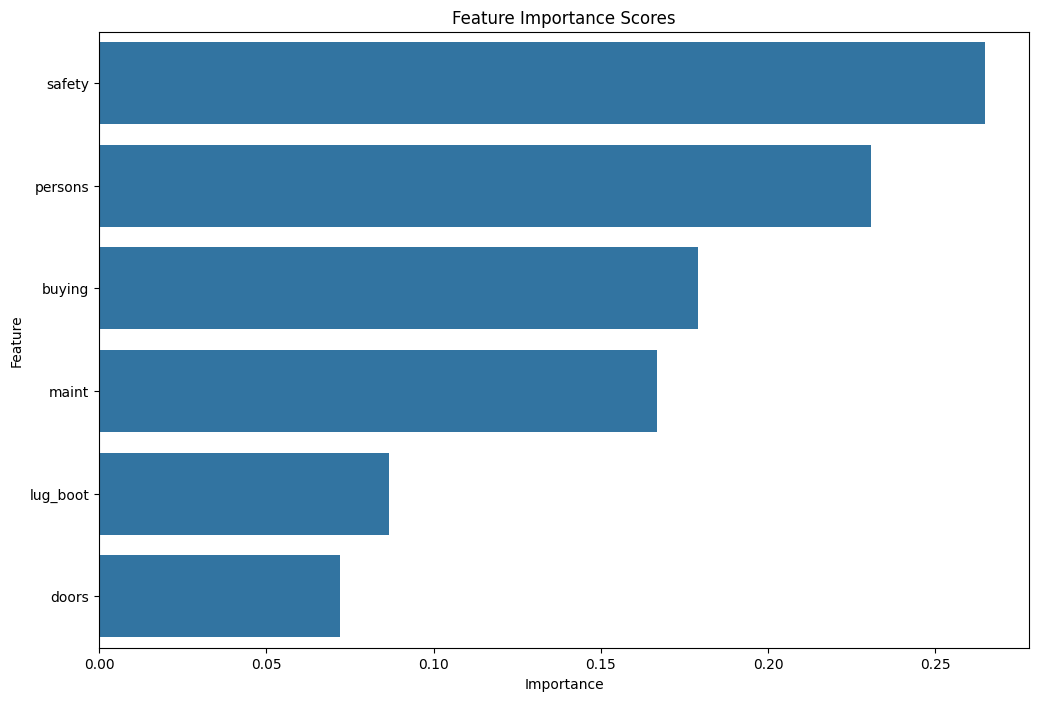

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance scores to understand the relative importance of different features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Scores')
plt.show()

In [13]:
# Select top 3 features based on feature importance scores
selected_features = feature_importance_df['Feature'][:3]

# Create a new dataframe withonly the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize Random Forest Classifier with n_estimators = 100
rf_selected = RandomForestClassifier(n_estimators=100)

# Fit the model to the selected features
rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, rf_selected.predict(X_test_selected)))

[[115   0  35   7]
 [ 24   0   0   4]
 [ 32   0 440   1]
 [ 24   0   0   9]]


In [15]:
# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_test, rf_selected.predict(X_test_selected))

# Display the confusion matrix
print(confusion_matrix)

[[115   0  35   7]
 [ 24   0   0   4]
 [ 32   0 440   1]
 [ 24   0   0   9]]


In [16]:
# Compute classification report
class_report = classification_report(y_test, rf_selected.predict(X_test_selected))

# Display classification report
print(class_report)

              precision    recall  f1-score   support

         acc       0.59      0.73      0.65       157
        good       0.00      0.00      0.00        28
       unacc       0.93      0.93      0.93       473
       vgood       0.43      0.27      0.33        33

    accuracy                           0.82       691
   macro avg       0.49      0.48      0.48       691
weighted avg       0.79      0.82      0.80       691



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
